# MNIST Fashion Image Classification

### Load and prepare dataset

In [388]:
# import the desired packages
from keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [352]:
# load dataset
(X_train1, y_train1), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_validation, y_train, y_validation = train_test_split(X_train1, y_train1, train_size=0.75, random_state=42)

In [353]:
print("Training set is", X_train.shape[0]*100/X_train1.shape[0],"% of the original training data set")  # percentage of training set
print("Validation set is",X_validation.shape[0]*100/X_train1.shape[0],"% of the total data set") # percentage of validation set

Training set is 75.0 % of the original training data set
Validation set is 25.0 % of the total data set


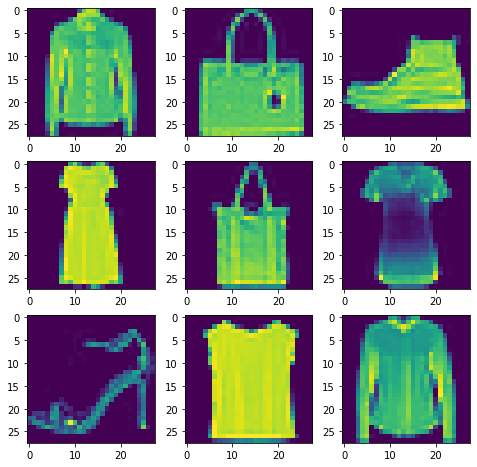

In [360]:
# plot first few images
plt.figure(figsize=(8,8))
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# plot raw pixel data
    plt.imshow(X_train[i])
# show the figure
plt.show()

#### Scale pixels

In [361]:
# scale pixels
def prep_pixels(X_train, X_validation, X_test):
    # convert from integers to floats
    train_norm = X_train.astype('float32')
    validation_norm = X_validation.astype('float32')
    test_norm = X_test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    validation_norm = validation_norm/ 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, validation_norm, test_norm

X_train_prep, X_validation_prep, X_test_prep = prep_pixels(X_train, X_validation, X_test)

In [362]:
# Check preprocessing 
X_train_prep[2][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00784314, 0.        , 0.        ,
       0.6       , 0.22352941, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.2784314 ,
       0.09411765, 0.        , 0.00392157], dtype=float32)

#### Flatten data

In [366]:
# Flatten
X_train_final = [i.flatten('C') for i in X_train_prep]
X_validation_final = [i.flatten('C') for i in X_validation_prep]
X_test_final = [i.flatten('C') for i in X_test_prep]
len(X_train_final)

45000

**(a) Implement random forest for the dataset and report your model’s accuracy on the test set. You need to mildly tune the hyper-parameters such as number of estimators and max depth (with the validation data) for the random forest model.**

In [523]:
# we will use the DecisionTreeClassifier function available in the sklearn package
score_list = [] # initialise an empty list that will iteratively be appended the % accuracy
depth_range = [i for i in range(1,21)] # list containing values of max_depth from 1 to 20
estimators_range = [i for i in range(1,21)] # list containing values of n_estimators from 1 to 20
for depth in depth_range: # for loop going through all the values of max depth at a time
    for estimator in estimators_range: # for loop going through all the n_estimators for each max_depth
        RFC = RandomForestClassifier(max_depth = depth, n_estimators = estimator) # initialise a DecisionTreeClassifier 
        RFC.fit(X_train_final, y_train) # fit the model with the training data 
        y_pred = RFC.predict(X_validation_final) # predict the validation set using the trained model
        # find the number of correctly predicted data and divide by the total number of rows and append to score_list 
        score_list.append([metrics.accuracy_score(y_validation, y_pred)*100, depth, estimator])

The best classifier is for max depth = 18 and n_estimators = 20 with accuracy 87.167 %


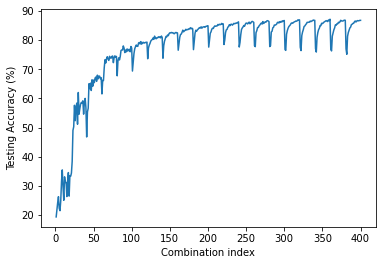

In [524]:
accuracy = [i[0] for i in score_list]
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between max_depth and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1,401), accuracy)
plt.xlabel('Combination index')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for max depth =', score_list[accuracy.index(max(accuracy))][1], 'and n_estimators =',
      score_list[accuracy.index(max(accuracy))][2], 'with accuracy', round(max(accuracy), 3), '%')

In [525]:
# create new decision tree classifier with the max_depth that gives the best accuracy on the training set
RFC = RandomForestClassifier(max_depth = score_list[accuracy.index(max(accuracy))][1], 
                             n_estimators = score_list[accuracy.index(max(accuracy))][2])
RFC.fit(X_train_final, y_train) # fit training data
prediction_train = RFC.predict(X_test_final) # predict training data
print("The accuracy of the tree is", round(metrics.accuracy_score(y_test, prediction_train)*100,3),'%')

The accuracy of the tree is 86.46 %


**(b) Implement a fully-connected neural network with the same setup as the code provided in class. You might need to adapt the model architecture therein to fit in this task, such as the input and output dimensions. For intermediate layers, you can simply use 12 and 8 neurons. Report the test accuracy of your trained neural network model. For this part, since we don’t tune the hyper-parameter, you can combine the training and validation set for the training of the neural network.**

In [390]:
# import the training and test data without dividing the train into validation
(X_train1, y_train1), (X_test, y_test) = fashion_mnist.load_data() 
# transform the categorical classes into dummy variable
encoder = LabelEncoder()
encoder.fit(y_train1) # fit the y_train
encoded_y = encoder.transform(y_train1) # transform the y_train
dummy_y_train = np_utils.to_categorical(encoded_y)
dummy_y_test = np_utils.to_categorical(encoder.transform(y_test)) # transform the y_test

def prep_pixels(X_train, X_test):
    # convert from integers to floats
    train_norm = X_train.astype('float32')
    test_norm = X_test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# call the prep pixel function
X_train1_prep, X_test_prep = prep_pixels(X_train1, X_test)

# flatten the data
X_train1_final = np.asarray([i.flatten('C') for i in X_train1_prep])
X_test_final = np.asarray([i.flatten('C') for i in X_test_prep])

# initialise the fully connected neural network
model = Sequential()
# add one intermediate layer with 12 neurons
model.add(Dense(12, input_dim = 784, activation='relu'))
# add one intermediate layer with 8 neurons
model.add(Dense(8, activation='relu'))
# add output layer with 10 neurons that will contain the 10 classes
model.add(Dense(10, activation='sigmoid'))
# flatten the input 
model.add(Flatten())
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model
model.fit(X_train1_final, dummy_y, epochs=30, batch_size=10, verbose =0)

In [391]:
# print the accuracy of the model
_, accuracy = model.evaluate(X_test_final, dummy_y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 656us/step - loss: 0.0734 - accuracy: 0.8518
Accuracy: 85.18


**(c) Now, let’s explore a bit in terms of the hyper-parameter tuning of the neural network models. Please try out the following options and briefly report what you observe:**

In [398]:
# import the training and test data and divide the train into validation
(X_train1, y_train1), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_validation, y_train, y_validation = train_test_split(X_train1, y_train1, train_size=0.75, random_state=42)

# transform the categorical classes into dummy variable
encoder = LabelEncoder()
encoder.fit(y_train) # fit the y_train
dummy_y_train = np_utils.to_categorical(encoder.transform(y_train))
dummy_y_test = np_utils.to_categorical(encoder.transform(y_test))
dummy_y_validation = np_utils.to_categorical(encoder.transform(y_validation))

def prep_pixels(X_train, X_validation, X_test):
    # convert from integers to floats
    train_norm = X_train.astype('float32')
    validation_norm = X_validation.astype('float32')
    test_norm = X_test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    validation_norm = validation_norm/ 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, validation_norm, test_norm

# call the prep pixel function
X_train_prep, X_validation_prep, X_test_prep = prep_pixels(X_train, X_validation, X_test)

# flatten the data
X_train_final = np.asarray([i.flatten('C') for i in X_train_prep])
X_validation_final = np.asarray([i.flatten('C') for i in X_validation_prep])
X_test_final = np.asarray([i.flatten('C') for i in X_test_prep])

**- Add one more layer between the 12-neuron layer and the input layer; decide the numbers of neurons on that layer on your own.**

In [526]:
acc_list = []
neurons_range = [20,50,100,150,200]
for neurons in neurons_range: # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(12, input_dim = 784,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, dummy_y_train, epochs=30, batch_size=10, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 1s 798us/step - loss: 0.0702 - accuracy: 0.8874


The best classifier is for neurons = 150 with accuracy 89.12 %


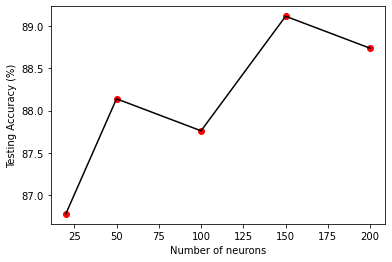

In [527]:
plt.scatter(neurons_range, acc_list, color = 'r')
plt.plot(neurons_range, acc_list, color = 'black')
plt.xlabel('Number of neurons')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for neurons =', neurons_range[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

From the plot above, we can clearly see that the accuracy of the model varies depending on the number of neurons introduced between the input layer and the 12-neuron layer. The main trend observed is that the accuracy is mainly increasing as the number of neurons is increasing (from 86.5% to 89.5% from 25 to 150 neurons). However, note that there is a small decrease (0.5% decrease in accuracy) when passing from 50 to 100 and 150 to 200 neurons. This decrease can be considered insignificant.

In [528]:
model = Sequential()
model.add(Dense(neurons_range[acc_list.index(max(acc_list))], activation='relu'))
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, dummy_y_train, epochs=30, batch_size=10, verbose = 0)
_, accuracy = model.evaluate(X_test_final, dummy_y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 657us/step - loss: 0.0777 - accuracy: 0.8535
Accuracy: 85.35


However, by increasing the number of neurons after the input layer to 150, the accuracy obtained on the test dataset is of 85.35% slightly higher than our original model at 85.18%.

**- Change the numbers of the neurons (12 and 8) to other values.**

In [407]:
acc_list = []
neurons_range1 = [20,50,100]
neurons_range2 = [50,20,100]
combinations = ['20/50','50/20','100/100']
for neurons1, neurons2 in zip(neurons_range1,neurons_range2): # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(neurons1, input_dim = 784,activation='relu'))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, np.asarray(dummy_y_train), epochs=30, batch_size=10, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 765us/step - loss: 0.0755 - accuracy: 0.8897


The best classifier is for neuron1 = 100  and for neuron2 = 100 with accuracy 88.967 %


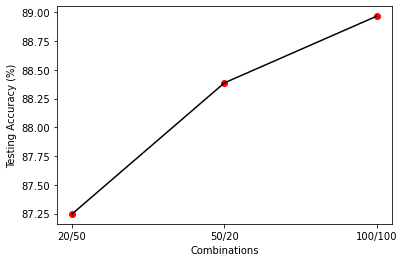

In [411]:
plt.scatter(combinations, acc_list, color = 'r')
plt.plot(combinations, acc_list, color = 'black')
plt.xlabel('Combinations')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for neuron1 =', neurons_range1[acc_list.index(max(acc_list))],
      ' and for neuron2 =', neurons_range2[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

From the plot above, the accuracy of the model linearly increased depending on the comnbination of the intermediate layers introduced. By increasing the number of neurons in the second intermediate layer to 50 and the first one to 20, we saw that our model did better at finding patterns in the data than when the number of neurons was increased in the first intermediate layer to 50 and the second one to 20. Moreover, the maximum accuracy was obtained at the 100/100 neurons combination for both intermediate layers. We will now analyse the accuracy obtained when predicting the test dataset with a combination of 100/100.

In [414]:
model = Sequential()
model.add(Dense(neurons_range1[acc_list.index(max(acc_list))], input_dim = 784,activation='relu'))
model.add(Dense(neurons_range2[acc_list.index(max(acc_list))], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, np.asarray(dummy_y_train), epochs=30, batch_size=10, verbose = 0)
_, accuracy = model.evaluate(X_test_final, np.asarray(dummy_y_test))
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 800us/step - loss: 0.3251 - accuracy: 0.9000
Accuracy: 90.00


The accuracy increased to 90%! by approximately 5% for the 100/100 combination, validating this new hyperparameter.

**- Change the loss function (through the loss in the compile function).**

In [490]:
acc_list = []
loss_types = ['categorical_crossentropy','poisson','kl_divergence','mean_squared_error','cosine_similarity','hinge']
for loss in loss_types: # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(12, input_dim = 784,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, np.asarray(dummy_y_train), epochs=30, batch_size=10, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 614us/step - loss: 0.9825 - accuracy: 0.2858


The best classifier is for loss function = categorical_crossentropy with accuracy 86.587 %


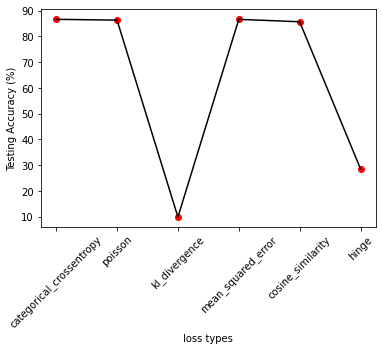

In [491]:
plt.scatter(loss_types, acc_list, color = 'r')
plt.plot(loss_types, acc_list, color = 'black')
plt.xlabel('loss types')
plt.ylabel('Testing Accuracy (%)')
plt.xticks(rotation=45)
print('The best classifier is for loss function =', loss_types[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

From the plot above, the accuracy of the model was dependent on the loss_function introduced in the mdoel. In fact, in comparison to our first model, there was not a lot of change in the accuracy of our model for the categorical_crossentropy, poisson, mean_squared_error and cosine similarity, with an approximate similar validation accuracy. Still, the categorical entropy loss function was proven the most efficient of the 6 wth an accuracy of 86.587%. the kl_divergence and hinge bloss function however did incredibly bad.

In [481]:
model = Sequential()
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss=loss_types[acc_list.index(max(acc_list))], optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, np.asarray(dummy_y_train), epochs=30, batch_size=10, verbose = 0)
_, accuracy = model.evaluate(X_test_final, np.asarray(dummy_y_test))
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 640us/step - loss: -0.8732 - accuracy: 0.8527
Accuracy: 85.27


There was not a lot of difference in the accuracy obtained on our dataset compared to the original model (slight increase by 0.12%), meaning that either binary_crossentropy or categorical_crossentropy is good for this dataset.

**- Change the epochs and batch size in the fit function.**

#### Batch size

In [492]:
batch_range = [25, 32, 64, 128]
acc_list = []
for batch in batch_range: # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(12, input_dim = 784,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, dummy_y_train, epochs=30, batch_size=batch, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 718us/step - loss: 0.0733 - accuracy: 0.8581


The best classifier is for batch size = 64 with accuracy 85.953 %


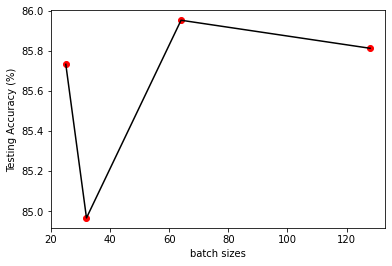

In [493]:
plt.plot(batch_range, acc_list, color = 'black')
plt.scatter(batch_range, acc_list, color = 'red')
plt.xlabel('batch sizes')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for batch size =', batch_range[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

Batch size denotes the subset size of the training sample which is going to be used in order to train the fully neural network during its learning process. From the graph above, we can see that the output is very different depending on the batch size and that there is no real trend that we can conclude. In fact, the accuracy drops from 85.7% to 84.9 when shifting from 25 to 32 batch size. In fact, the variation in the accuracy of the validation dataset is very low (from 85 to 86). By comparing every batch size independently, a size of 64 was proven the best with accuracy 85.95%. Let's now see how it does on the test set.

In [494]:
model = Sequential()
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, dummy_y_train, epochs=30, batch_size=batch_range[acc_list.index(max(acc_list))], verbose = 0)
_, accuracy = model.evaluate(X_test_final, np.asarray(dummy_y_test))
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 699us/step - loss: 0.0813 - accuracy: 0.8423
Accuracy: 84.23


Unexpectedly, our accuracy slightly dropped to 84.23%, almost 1%!, and hence irt would be better to stay with the initial size of 10.

#### Epochs

In [482]:
epochs_range = [10, 50, 100,150,200]
acc_list = []
for epochs in epochs_range: # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(12, input_dim = 784,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, dummy_y_train, epochs=epochs, batch_size=10, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 641us/step - loss: 0.0925 - accuracy: 0.8526


The best classifier is for epochs = 100 with accuracy 85.88 %


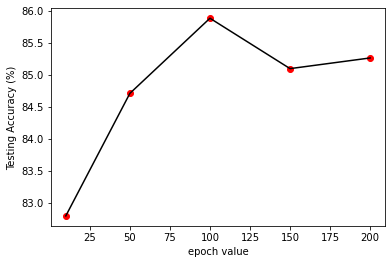

In [483]:
plt.plot(epochs_range, acc_list, color = 'black')
plt.scatter(epochs_range, acc_list, color = 'r')
plt.xlabel('epoch value')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for epochs =', epochs_range[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

Epochs defines the number of cylces the neural network was trained with all the training data. The highest accuracy was obtained at 100 epochs at 85.88%. From 82.5% at epochs 10 (too low), to 85.88% at epochs 100, slightly higher than the accuracy of ouroriginal model.

In [484]:
model = Sequential()
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, dummy_y_train, epochs=epochs_range[acc_list.index(max(acc_list))], batch_size=10, verbose = 0)
_, accuracy = model.evaluate(X_test_final, np.asarray(dummy_y_test))
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 656us/step - loss: 0.0900 - accuracy: 0.8400
Accuracy: 84.00


However, despite the increase in validation accuracy, the model did worse than the original one on the tes accuracy by less than 1%. In fact, keeping an epochs of 30 would lead to a better testing accuracy.

**(d) Run the F MNIST.py and briefly explain what the following functions do in the script**
- define model
- evaluate model
- summarize diagnostics

**Briefly explain how the validation (for the training of CNN) is set up in this script. What is the output of the script, and how does it compare to the results in the previous parts?**

First of all, the define_model function starts by creating a neural network model using a sequential model API where an instance of the Sequential class is created and model layers are created and added to it. Then, the function add a convolution kernel using Conv2D, being a single convolutional layer with a small filter size (3,3) and a number of filters (32). Another layer is then added to the model, the max pooling layer, that outputs a feature map containing the most prominent features. The filter maps is then flattened by adding a flattening layere to provide the features to the classifier. Having initialised the convolutional neural network, one intermediate layer is added and is composedof 100 neurons with the rectified linear unit activation function. One final output layer is added to the model composed of 10 neurons in order to predict the probability distribution of an image belonging to each of the 10 classes. Having defined the different layers of our model, the last step is to compile everything by first defining the optimiser as the stochastic gradient descent optimizer with a learning rate of 0.01 and a momentum of 0.9, then the loss function was chosen as categorical_crossentropy and the metric set as accuracy.

Having defined the model and the different layers that composes it, we will now evaluate it using k-fold cross-validation, where the main sample is arbritarly partitioned into k equal sized subsamples and one of the subsamples is retrieved and set as the validation set for testing the model. The remaining k − 1 subsamples are used as training data to train our model. Having set the value of K to 5, The cross-validation process is then repeated k=5 times, where the validation set will switch from one subsampel to the other so that each subsample was used once as validation. Finally, the 5 results will then be averaged to produce a single estimation. This K-fold cross validation is mainly how the validation set for the training of CNN was set up in this script, where at each run the validation set will be made of 1/5 (20%) of the training set. Having defined the crossvalidation, a for loop will enumerate the samples and split the data by indicating which set is the validation as the test set while the rest of teh data is considered as training set. The model is then fitted the data with the corresponding dataset as train and validation data, an epochs of 10 and batch_size of 32. Finally, the model's accuracy is calculated using the test set and appended to the score list defined as the beginning of the function, while the histories list is appending the model fitted at the corresponding iteration. For each different split, until every subsample was set as validation once, the same procedure is repeated. The function will finally return the list of scores and models obtained for each split.

The last function to explain is the summarize diagnostics function that is responsible to plot the diagnostic of the learning behaviour during training using the list of fitted model in the training histories list. In fact, the function will plot two subplots on top of each other, showing model performance on the training and test set during each fold of the k-fold cross-validation. The first plot will show the cross-entropy loss for each model where blue lines indicate model performance/loss on the training dataset and orange lines will indicate the validation model performance/loss on the validation subsample defined in each split. The second plot, that will be positionned below the first one, will show the accuracy of each model on the training dataset represented in blue as well as the validation accuracy/the accuracy of the model on the validation dataset in orange. The last step of the function after defijning the subplots is to plot and show the figure.

Finally, the output of the script comes from the evaluate_model function that prints out teh accuracy of the model for each k splits, where the validation set and training set are different for each split as explained above. The validation accuracy average at 91.253% way higher than the accuracy obtained for our original model above. The only model that got an accuracy close to the CNN model is when the intermediate layers were set at 100 neurons each, with an accuracy of 90% on the test set. The rest of the models varied between 84 to 86% on average compared to this one.

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



> 91.442
> 91.150
> 91.475
> 91.392
> 90.808


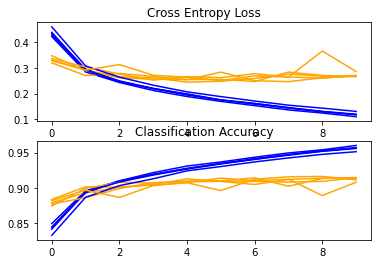

Accuracy: mean=91.253 std=0.250, n=5


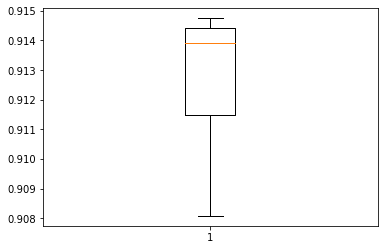

In [433]:
# model with padded convolutions for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

# entry point, run the test harness
run_test_harness()